# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [27]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
import pandas as pd




#1 URL del recurso 
resource_url = "https://ycharts.com/companies/TSLA/revenues"




#Encabezados que simulan una solicitud desde un navegador

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
}

#2 Petición para descargar el fichero de Internet
response = requests.get(resource_url, headers=headers)

# Si la petición se ha ejecutado correctamente (código 200), entonces el contenido HTML de la página se ha podido descargar
if response.status_code == 200:
    #3 Transformamos el HTML plano en un HTML real (estructurado y anidado, con forma de árbol)
    soup = BeautifulSoup(response.text, 'html.parser') # es más actual que usar solo 'html'

print(response.status_code)

soup


# Obtener todos los elementos de tipo 'td' del documento HTML
data_rows = soup.find_all("tr")

print(data_rows)

extracted_data = []

for row in data_rows:
    columns = row.find_all("td")
    columns =[ele.text.strip() for ele in columns]
    if columns:
            extracted_data.append(columns)


# Creación del DataFrame
df = pd.DataFrame(extracted_data, columns=["Date", "Revenue"])  #


# Filtrar filas donde "Revenue" no esté vacío
df = df[df["Revenue"] != ""]

# Selecciona las primeras 50 filas para df_clean
df_clean = df.head(50)


# Convierte "Date" a formato de fecha
df_clean["Date"] = pd.to_datetime(df_clean["Date"])


 #Función para convertir valores a millones
def convert_to_millions(value):
    try:
        if 'B' in value:
            # Elimina 'B', convierte a float y multiplica por 1000 para pasar a millones
            return float(value.replace('B', '').replace(',', '').strip()) * 1000
        elif 'M' in value:
            # Elimina 'M', convierte directamente a float
            return float(value.replace('M', '').replace(',', '').strip())
        else:
            # Retorna NaN si el valor no contiene 'B' o 'M'
            return float('nan')
    except ValueError:
        return float('nan')

# Aplica la conversión en la columna "Revenue"
df_clean["Revenue"] = df_clean["Revenue"].apply(convert_to_millions)

display(df_clean)












200
[<tr>
<th>Date</th>
<th class="text-right">Value</th>
</tr>, <tr>
<td>September 30, 2024</td>
<td class="text-right">
                            
                                25.18B
                            
                        </td>
</tr>, <tr>
<td>June 30, 2024</td>
<td class="text-right">
                            
                                25.50B
                            
                        </td>
</tr>, <tr>
<td>March 31, 2024</td>
<td class="text-right">
                            
                                21.30B
                            
                        </td>
</tr>, <tr>
<td>December 31, 2023</td>
<td class="text-right">
                            
                                25.17B
                            
                        </td>
</tr>, <tr>
<td>September 30, 2023</td>
<td class="text-right">
                            
                                23.35B
                            
                        </t

/tmp/ipykernel_860/3240463497.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Date"] = pd.to_datetime(df_clean["Date"])
/tmp/ipykernel_860/3240463497.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Revenue"] = df_clean["Revenue"].apply(convert_to_millions)


,Date,Revenue
0,2024-09-30,25180.00
1,2024-06-30,25500.00
2,2024-03-31,21300.00
3,2023-12-31,25170.00
4,2023-09-30,23350.00
5,2023-06-30,24930.00
6,2023-03-31,23330.00
7,2022-12-31,24320.00
8,2022-09-30,21450.00
9,2022-06-30,16930.00


In [17]:
# Conectar a la base de datos (crea el archivo si no existe)
conn = sqlite3.connect("tesla_revenue.db")
cursor = conn.cursor()

# Crear la tabla "revenue" si no existe
cursor.execute("""
    CREATE TABLE IF NOT EXISTS revenue (
        Date TEXT,
        Revenue REAL
    )
""")

df_clean.to_sql("revenue", conn, if_exists="replace", index=False)

print("Datos almacenados en la base de datos 'tesla_revenue.db'")


Datos almacenados en la base de datos 'tesla_revenue.db'


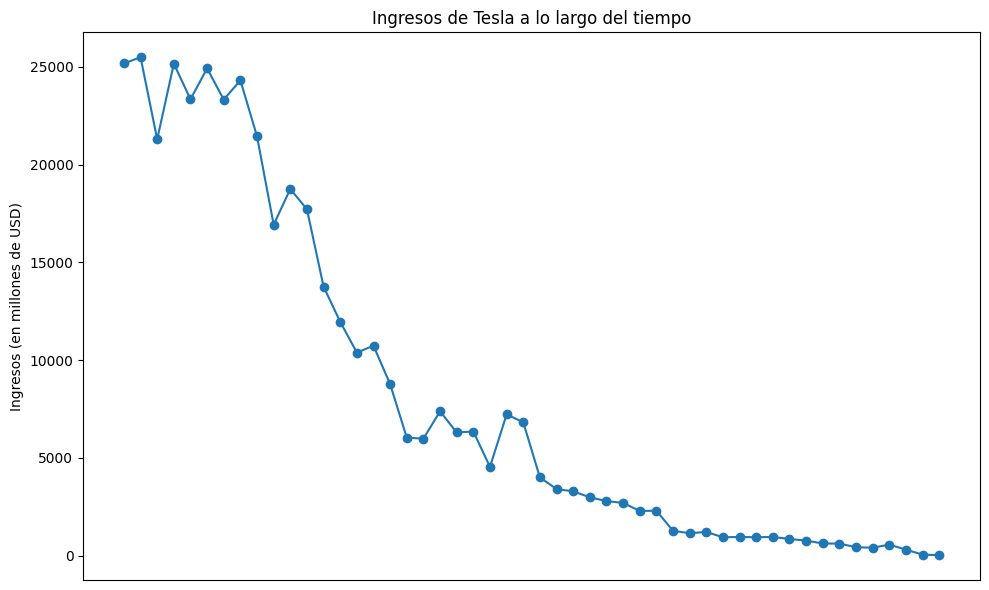

In [28]:
# Conectar a la base de datos y cargar los datos en un DataFrame
conn = sqlite3.connect("tesla_revenue.db")
df_revenue = pd.read_sql_query("SELECT * FROM revenue", conn)
conn.close()

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator

# Graficar los ingresos a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df_revenue["Date"], df_revenue["Revenue"], marker='o', linestyle='-')
plt.title("Ingresos de Tesla a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Ingresos (en millones de USD)")

# Configurar el eje X para mostrar solo los años
locator = YearLocator()  # Muestra solo los años
formatter = DateFormatter("%Y")  # Formato para mostrar solo el año

plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Ocultar todas las etiquetas del eje X
plt.gca().xaxis.set_visible(False)

# Rotar etiquetas y ajustar el diseño
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()



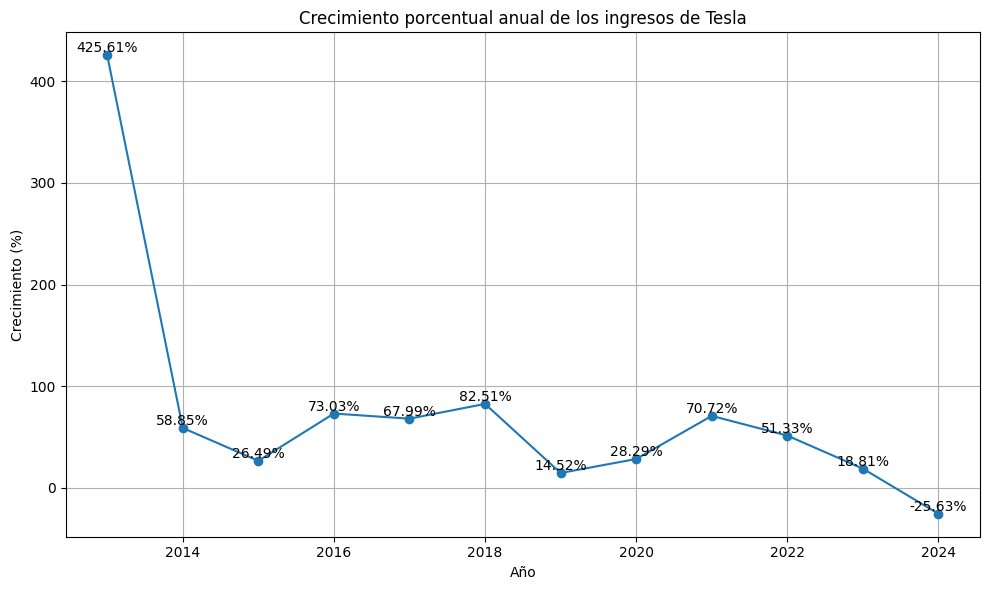

In [35]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conectar a la base de datos y cargar los datos en un DataFrame
conn = sqlite3.connect("tesla_revenue.db")
df_revenue = pd.read_sql_query("SELECT * FROM revenue", conn)
conn.close()

# Convertir la columna "Date" a formato de fecha y eliminar cualquier fila con fechas inválidas
df_revenue["Date"] = pd.to_datetime(df_revenue["Date"], errors='coerce')
df_revenue = df_revenue.dropna(subset=["Date"])

# Extraer el año de cada fecha para agrupar por año
df_revenue["Year"] = df_revenue["Date"].dt.year

# Agrupar por año y calcular el ingreso total o promedio por año
annual_revenue = df_revenue.groupby("Year")["Revenue"].sum().reset_index()

# Calcular el crecimiento porcentual año a año
annual_revenue["Growth (%)"] = annual_revenue["Revenue"].pct_change() * 100

# Graficar el porcentaje de crecimiento anual
plt.figure(figsize=(10, 6))
plt.plot(annual_revenue["Year"], annual_revenue["Growth (%)"], marker='o', linestyle='-')
plt.title("Crecimiento porcentual anual de los ingresos de Tesla")
plt.xlabel("Año")
plt.ylabel("Crecimiento (%)")
plt.grid(True)

# Añadir etiquetas de porcentaje en cada punto
for i in range(len(annual_revenue)):
    year = annual_revenue["Year"].iloc[i]
    growth = annual_revenue["Growth (%)"].iloc[i]
    if pd.notna(growth):  # Solo añadir etiqueta si el valor no es NaN
        plt.text(year, growth, f"{growth:.2f}%", ha="center", va="bottom", fontsize=10)

# Mostrar la gráfica
plt.tight_layout()
plt.show()



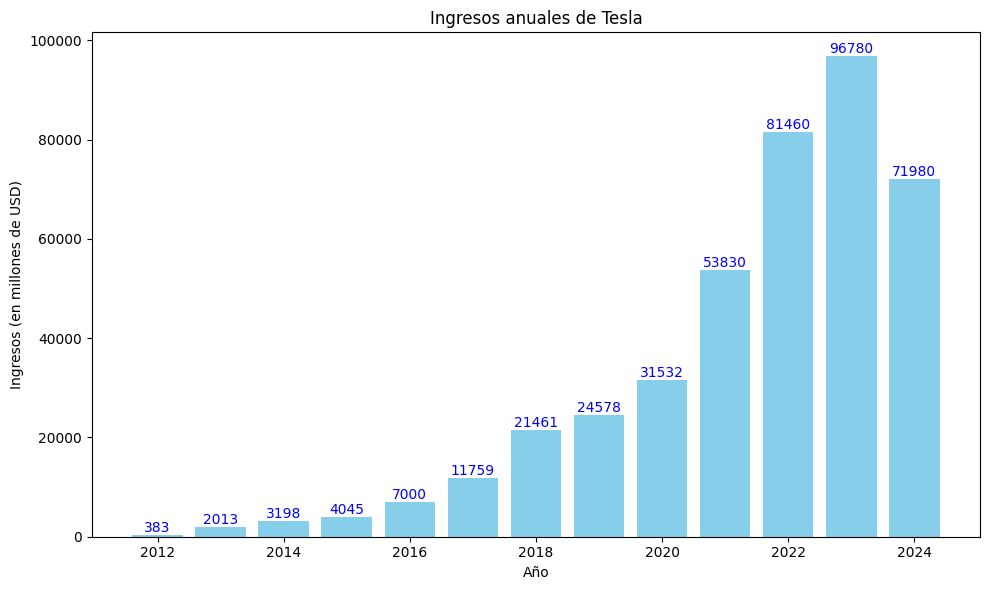

In [40]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conectar a la base de datos y cargar los datos en un DataFrame
conn = sqlite3.connect("tesla_revenue.db")
df_revenue = pd.read_sql_query("SELECT * FROM revenue", conn)
conn.close()

# Convertir la columna "Date" a formato de fecha y eliminar cualquier fila con fechas inválidas
df_revenue["Date"] = pd.to_datetime(df_revenue["Date"], errors='coerce')
df_revenue = df_revenue.dropna(subset=["Date"])

# Extraer el año de cada fecha para agrupar por año
df_revenue["Year"] = df_revenue["Date"].dt.year

# Agrupar por año y calcular el ingreso total por año
annual_revenue = df_revenue.groupby("Year")["Revenue"].sum().reset_index()

# Crear el gráfico de barras para los ingresos anuales
plt.figure(figsize=(10, 6))
bars = plt.bar(annual_revenue["Year"], annual_revenue["Revenue"], color="skyblue", label="Ingresos")
plt.xlabel("Año")
plt.ylabel("Ingresos (en millones de USD)")
plt.title("Ingresos anuales de Tesla")

# Añadir etiquetas de ingresos en millones en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval)}", ha="center", va="bottom", color="blue")

# Mostrar la gráfica
plt.tight_layout()
plt.show()

